## Population plots

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from sklearn.metrics import r2_score


plt.rcParams.update({'font.size':15, 'figure.figsize':(11,5)})

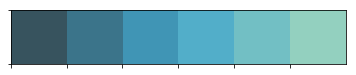

In [12]:
def make_pop_plot(period = p1975):
    f, ax = plt.subplots(figsize=(10,5))

    ax.scatter(data[period].Year, 
               data[period].Population / 10**6, 
               c='black', 
               label='Population')
    
    return f, ax

sns.palplot(sns.mpl_palette("GnBu_d"))


resp = requests.get('http://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en')

dst_url_a = 'http://api.statbank.dk/v1/data/FT/CSV?lang=en&TID=*'
data = pd.read_csv(dst_url_a, sep=';')
data.rename(columns={'INDHOLD':'Population', 'TID':'Year'}, inplace=True)

extra_years = [y for y in np.arange(2020,2055,5) if y>data.Year.max()]
data = data.append(pd.DataFrame(extra_years,columns=['Year']))

p1975 = data.Year < 1976
p2018 = data.Year < 2019



Text(0,0.5,'Population, mil.')

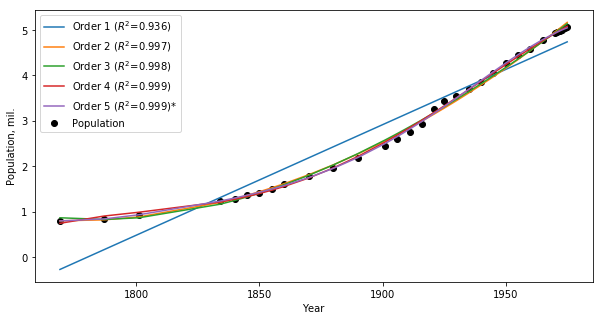

In [9]:
f_pop1, ax = make_pop_plot()

x = data[p1975].Year
y_t = data.loc[p1975, 'Population'] / 10 **6

models = {}
r2s = []

for d in range(5):    
    models[d] = np.polyfit(x, y_t, deg=d+1)
    r2s.append(r2_score(y_t, np.polyval(models[d], x)))

for d in range(5):    
    v = 'Order %i' % (d+1) 
    y_p = np.polyval(models[d], x)    
    r2 = r2_score(y_t, y_p)
    
    plot_label = v + (' ($R^2$=%.3f)%s' % (r2, {True:'*', False:''}[r2>=max(r2s)]))
    ax.plot(x, y_p, label=plot_label)


ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Population, mil.')

Text(0,0.5,'Population, mil.')

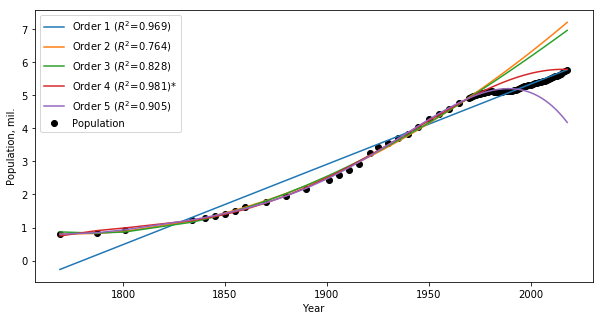

In [14]:
f_pop2, ax = make_pop_plot(p2018)

x = data[p2018].Year
y_t = data.loc[p2018, 'Population'] / 10 **6

r2s = []

for d in range(5):    
    
    r2s.append(r2_score(y_t, np.polyval(models[d], x)))

for d in range(5):    
    v = 'Order %i' % (d+1) 
    y_p = np.polyval(models[d], x)    
    r2 = r2_score(y_t, y_p)
    
    plot_label = v + (' ($R^2$=%.3f)%s' % (r2, {True:'*', False:''}[r2>=max(r2s)]))
    ax.plot(x, y_p, label=plot_label)


ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Population, mil.')

Text(0,0.5,'Population, mil.')

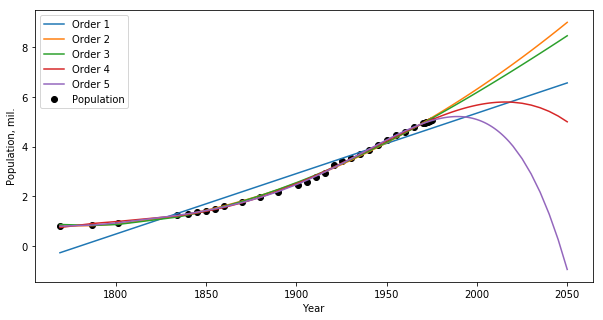

In [6]:
f_pop3, ax = make_pop_plot(p2018)

x = data[:].Year
y_t = data.loc[:, 'Population'] / 10 **6

for d in range(5):
    v = 'Order %i' % (d+1)         
    y_p = np.polyval(models[d], x)    
    ax.plot(x, y_p, label=v)


ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Population, mil.')